## Display a ZTF Object
This notebook replicates the information and plots that can be found on the ZTF web page for an object.
Given the object name, we fetch its JSON data package, then unpack it to show the contents, 
and make two plots: the light curve and the positions of the detections.

We use wget to fetch the data packet for the object __[ZTF17aaafido](https://lasair.roe.ac.uk/object/ZTF17aaafido/)__
Click on the link to see how Lasair represents the data.

In [60]:
import os
import json
objectId = 'ZTF17aaafido'
file = objectId + '.json'
os.system('wget -O %s.json https://lasair.roe.ac.uk/object/%s/json/' % (objectId, objectId))
data = json.loads(open(file).read())

There are three sections in the package: 
-  objectData, a dictionary of properties of the object
-  crossmatches, a list of dictionaries, each being a possible catalogue object, where the rank shows which is the most likely identification, 1 being best.
-  candidates, a list of dictionaries, each being a detection of the object.
<br>


In the following, we write out all this data so you can see what is in the package:

In [61]:
print ('Object Data')
print ('-----------')
for key,value in data['objectData'].items():
    print(key +' = '+ str(value))
    
print ('\nCrossmatches')
print ('-----------')
for crossmatch in data['crossmatches']:
    for key,value in crossmatch.items():
        print(key +' = '+ str(value))
    print()
        
print ('\nCandidates')
print ('-----------')
for candidate in data['candidates']:
    for key,value in candidate.items():
        print(key +' = '+ str(value))
    print()

Object Data
-----------
primaryId = 1241243
ncand = 96
ramean = 28.709203052083335
decmean = 51.42238327916667
glonmean = 132.897264838
glatmean = -10.2185006261
classification = VS
annotation = The transient is synonymous with <em>359504980472540672/01545020+51</em>; a B=15.83 mag stellar source found in the GAIA/2MASS/GSC catalogues. It's located 0.1 arcsec from the stellar source core.
separationArcsec = 0.05429033767920155

Crossmatches
-----------
catalogue_object_id = 359504980472540672/01545020+51
catalogue_table_name = GAIA/2MASS/GSC
catalogue_object_type = star
separationArcsec = 0.05429033767920155
r = None
g = None
photoZ = None
rank = 1

catalogue_object_id = 359504980472540672
catalogue_table_name = Gaia DR1
catalogue_object_type = star
separationArcsec = 0.05429033767920155
r = None
g = None
photoZ = None
rank = None

catalogue_object_id = 01545020+5125207 
catalogue_table_name = 2MASS PSC
catalogue_object_type = star
separationArcsec = 0.14893415036234248
r = None
g = No

### Now we will do a couple of plots

In [62]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The light curve in two filters: fid=1 (red, C2) and fid=2 (green, C3).
Also included are the non-detections of the object, which are entries that do not have a candidate id (candid). 
In this case the magnitude (magpsf) should be interpreted as a limiting magnitude, rather than detection magnitude.
These points are shown as crosses in pink (C6) and olive (C8).

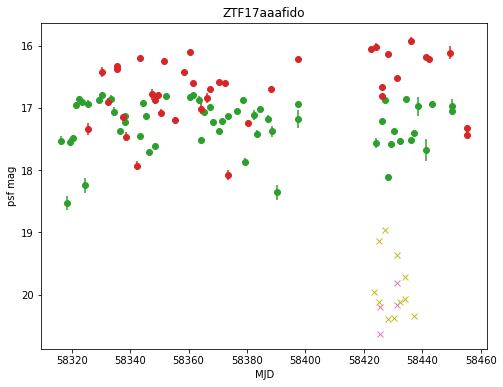

In [63]:
mjd       = [[],[]]
magpsf    = [[],[]]
sigmapsf  = [[],[]]
nonmjd    = [[],[]]
nonmagpsf = [[],[]]
for candidate in data['candidates']:
    fid = candidate['fid'] - 1
    if 'candid' in candidate:
        mjd[fid].append(candidate['jd'] - 2400000.5)
        magpsf[fid].append(candidate['magpsf'])
        sigmapsf[fid].append(candidate['sigmapsf'])
    else:
        nonmjd[fid].append(candidate['jd'] - 2400000.5)
        nonmagpsf[fid].append(candidate['magpsf'])

plt.figure(figsize=(8,6))
plt.errorbar(mjd[0], magpsf[0], yerr=sigmapsf[0], c="C2", fmt='o')
plt.errorbar(mjd[1], magpsf[1], yerr=sigmapsf[1], c="C3", fmt='o')
plt.errorbar(nonmjd[0], nonmagpsf[0], c="C6", fmt='x')
plt.errorbar(nonmjd[1], nonmagpsf[1], c="C8", fmt='x')
plt.xlabel("MJD")
plt.ylabel("psf mag")
plt.title(objectId)
plt.gca().invert_yaxis()
plt.show()

Now we plot the locations of the individual detections (candidates). 
Again in red and green for the two filters. 
The RA scale is stretched to show sctual sky geometry.

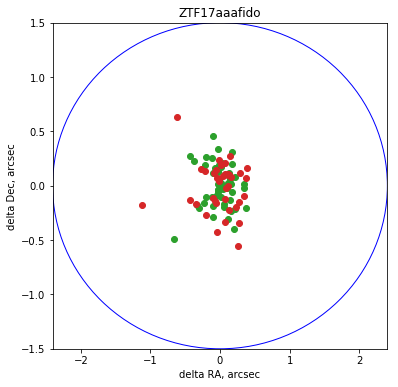

In [64]:
import math
from matplotlib.patches import Ellipse
ramean = data['objectData']['ramean']
decmean = data['objectData']['decmean']
ra  = [[],[]]
dec = [[],[]]
for candidate in data['candidates']:
    fid = candidate['fid'] - 1
    if 'candid' in candidate:
        ra[fid].append(3600*(candidate['ra'] - ramean))
        dec[fid].append(3600*(candidate['decl'] - decmean))

rastretch = 1.0/math.cos(math.radians(decmean))
plt.figure(figsize=(6,6))
plt.errorbar(ra[0], dec[0], c="C2", fmt='o')
plt.errorbar(ra[1], dec[1], c="C3", fmt='o')
plt.xlim(-1.5*rastretch, 1.5*rastretch)
plt.ylim(-1.5, 1.5)
plt.xlabel("delta RA, arcsec")
plt.ylabel("delta Dec, arcsec")
plt.title(objectId)
circle = Ellipse((0, 0), 3*rastretch, 3, color='b', fill=False)
plt.gca().add_artist(circle)
plt.show()